In [1]:
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

In [2]:
cifar10 = keras.datasets.cifar10
(X_train, Y_train), (X_test, Y_test) = cifar10.load_data()

In [3]:
print('Training data shape: ', np.shape(X_train))
print('Training labels shape: ',np.shape(Y_train))
print('Test data shape: ', np.shape(X_test))
print('Test labels shape: ', np.shape(Y_test))

Training data shape:  (50000, 32, 32, 3)
Training labels shape:  (50000, 1)
Test data shape:  (10000, 32, 32, 3)
Test labels shape:  (10000, 1)


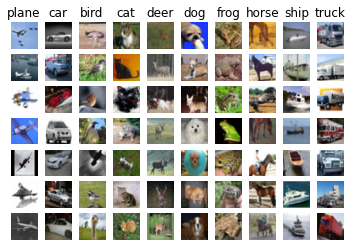

In [4]:
classes = ['plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
num_classes = len(classes)
samples_per_class = 7
for y, cls in enumerate(classes):
    idxs = np.flatnonzero(Y_train == y)
    idxs = np.random.choice(idxs, samples_per_class, replace=False)
    for i, idx in enumerate(idxs):
        plt_idx = i * num_classes + y + 1
        plt.subplot(samples_per_class, num_classes, plt_idx)
        plt.imshow(X_train[idx].astype('uint8'))
        plt.axis('off')
        if i == 0:
            plt.title(cls)
plt.show()

In [5]:
# Memory error prevention by subsampling data
num_training = 10000
mask = list(range(num_training))
X_train = X_train[mask]
y_train = Y_train[mask]

num_test = 1000
mask = list(range(num_test))
X_test = X_test[mask]
y_test = Y_test[mask]

In [6]:
X_train = np.reshape(X_train, (X_train.shape[0], -1))
X_test = np.reshape(X_test, (X_test.shape[0], -1))
print(X_train.shape, X_test.shape)

(10000, 3072) (1000, 3072)


In [7]:
class KNearestNeighbor(object):
    def __init__(self):
        pass
    def train(self, X, y):
        self.X_train = X
        self.y_train = y
    def predict(self, X, k=1, num_loops=0):
        if num_loops == 0:
            dists = self.compute_distances(X)
        else:
            raise ValueError('Invalid value %d for num_loops' % num_loops)
        return self.predict_labels(dists, k=k)


    def compute_distances(self, X):
        num_test = X.shape[0]
        num_train = self.X_train.shape[0]
        dists = np.zeros((num_test, num_train)) 
        dists = np.sqrt(np.sum(np.square(self.X_train), axis=1) + np.sum(np.square(X), axis=1)[:, np.newaxis] - 2 * np.dot(X, self.X_train.T))
        pass
        return dists

    def predict_labels(self, dists, k=1):
        num_test = dists.shape[0]
        y_pred = np.zeros(num_test)
        for i in range(num_test):
            closest_y = []
            sorted_dist = np.argsort(dists[i])
            closest_y = list(self.y_train[sorted_dist[0:k]])
            pass
            y_pred[i]= (np.argmax(np.bincount(closest_y)))
            pass
        return y_pred

In [26]:
num_folds = 5
k_choices = np.arange(1,21,1)

X_train_folds = []
y_train_folds = []

X_train_folds = np.array_split(X_train,num_folds)
y_train_folds = np.array_split(y_train,num_folds)
k_to_accuracies = {}



for k in k_choices:
    k_to_accuracies[k] = []
    for num_knn in range(0,num_folds):
        X_test = X_train_folds[num_knn]
        y_test = y_train_folds[num_knn]
        X_train = X_train_folds
        y_train = y_train_folds
        
        temp = np.delete(X_train,num_knn,0)
        X_train = np.concatenate((temp),axis = 0)
        y_train = np.delete(y_train,num_knn,0)
        y_train = np.concatenate((y_train),axis = 0)
        
        classifier = KNearestNeighbor()
        classifier.train(X_train, np.ravel(y_train))
        dists = classifier.compute_distances(X_test)
        y_test_pred = classifier.predict_labels(dists, k)

        num_correct = np.sum(y_test_pred == y_test)
        accuracy = float(num_correct) / num_test
        print('Got %d / %d correct => accuracy: %f' % (num_correct, num_test, accuracy))
        k_to_accuracies[k].append(accuracy)


print("Printing 5-fold accuracies for varying values of k:")
print()
for k in sorted(k_to_accuracies):
    for accuracy in k_to_accuracies[k]:
        print('k = %d, accuracy = %f' % (k, accuracy))

D:\anaconda3\envs\cvpr\lib\site-packages\numpy\core\_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


Got 63140 / 1000 correct => accuracy: 63.140000
Got 65520 / 1000 correct => accuracy: 65.520000
Got 67158 / 1000 correct => accuracy: 67.158000
Got 67977 / 1000 correct => accuracy: 67.977000
Got 76167 / 1000 correct => accuracy: 76.167000
Got 69700 / 1000 correct => accuracy: 69.700000
Got 65520 / 1000 correct => accuracy: 65.520000
Got 50778 / 1000 correct => accuracy: 50.778000
Got 72891 / 1000 correct => accuracy: 72.891000
Got 68796 / 1000 correct => accuracy: 68.796000
Got 69700 / 1000 correct => accuracy: 69.700000
Got 65520 / 1000 correct => accuracy: 65.520000
Got 50778 / 1000 correct => accuracy: 50.778000
Got 72891 / 1000 correct => accuracy: 72.891000
Got 68796 / 1000 correct => accuracy: 68.796000
Got 69700 / 1000 correct => accuracy: 69.700000
Got 65520 / 1000 correct => accuracy: 65.520000
Got 50778 / 1000 correct => accuracy: 50.778000
Got 72891 / 1000 correct => accuracy: 72.891000
Got 68796 / 1000 correct => accuracy: 68.796000
Got 69700 / 1000 correct => accuracy: 69

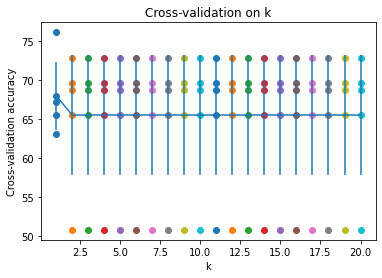

In [27]:
for k in k_choices:
    accuracies = k_to_accuracies[k]
    plt.scatter([k] * len(accuracies), accuracies)

# plot the trend line with error bars that correspond to standard deviation

accuracies_mean = np.array([np.mean(v) for k,v in sorted(k_to_accuracies.items())])
accuracies_std = np.array([np.std(v) for k,v in sorted(k_to_accuracies.items())])
plt.errorbar(k_choices, accuracies_mean, yerr=accuracies_std)
plt.title('Cross-validation on k')
plt.xlabel('k')
plt.ylabel('Cross-validation accuracy')
plt.show()
